In [1]:
from pylab import *
from math import pi
import numpy as np
from numpy import linalg

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [2]:
def plotParabolaThroughPoints(P1, P2, P3):
    M = np.mat([[P1[0]**2, P1[0], 1], [P2[0]**2, P2[0], 1], [P3[0]**2, P3[0], 1]])
    b = [P1[1], P2[1], P3[1]]
    
    S = linalg.solve(M, b)
    
    dx = (P3[0] - P1[0])/50.0
    X = arange(P1[0], P3[0]+dx, dx)
    Y = [S[0]*x**2 + S[1]*x + S[2] for x in X]
    fill_between(X, Y, alpha=0.5, edgecolor="black")

def plotSimpsonsRule(f, a, b, n):
    # plot the actual curve
    dx = (b-a)/100.0
    X = arange(a, b+dx, dx)
    plot(X, f(X))
    
    dx = (double(b)-double(a))/double(2*n)
    X = arange(a, b+dx, dx)
    Y = [f(x) for x in X]
    
    # plot the simpson parabolas
    for i in range(0, n):
        X = [a + (2*i+j)*dx for j in range(0,3)]
        P = [[x, f(x)] for x in X]
        plotParabolaThroughPoints(P[0], P[1], P[2])
    
    xlabel('x')
    ylabel('f(x)')
    area = simpsonSum(f, a, b, n)
    title("Simpsonsumme für f(x): {0:.5f}".format(area))
    xlim(a, b)
    return area

def simpsonSum(f, a, b, n):
    dx = (double(b)-double(a))/double(2*n)
    X = arange(a, b+dx, dx)
    Y = [f(x) for x in X]
    
    # calculate simspon sum
    sum1 = 0.0
    sum2 = 0.0
    for k in range(1, n+1):
        if k < n:
            sum1 += Y[2*k]
        sum2 += Y[2*k-1]
    return dx*(Y[0] + Y[-1] + 2*sum1 + 4*sum2)/3.0

∆A = -2.966E-01	(4.720E+00%)


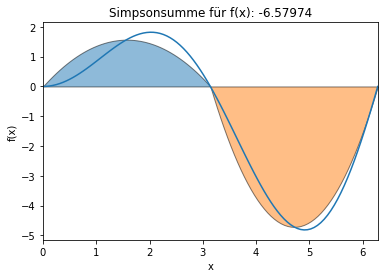

In [3]:
def f(x):
    return x*sin(x)
def F(x):
    return sin(x)-x*cos(x)

a = 0.0
b = 2*pi
n = 2

val = plotSimpsonsRule(f, a, b, n)
actual = F(b)-F(a)
print("∆A = {0:.3E}\t({1:.3E}%)".format(val-actual, 100.0*(val-actual)/actual))

1.0022798774922104

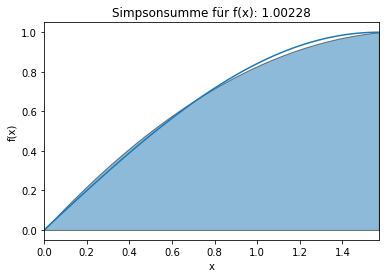

In [4]:
plotSimpsonsRule(lambda x: sin(x), 0, pi/2, 1)